# Исследование объявлений о продаже квартир

На данных сервиса Яндекс Недвижимость — архиве объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Цель - научиться определять рыночную стоимость объектов недвижимости, что позволит построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

   
Иследование проведем по следующим этапам:
    
    1. Изучим содержание данных; выявим наличие данных, требующих их предобработки (неудобный тип данных, дубликаты и пропуски).
    
    2. Проведем предобработку данных:
    
    - приведем к удобному формату данных;    
    - удалим дубликаты;
    - заполним пропуски значений, где это возможно.
    
    3. Добавим необходимые для исследования дополнительные столбцы с данными.
    
    4. Проведем исследовательский анализ данных:
    
    - выявим аномальные и редкие значения, исправим их там, где это возможно, либо удалим в случае, если они могут исказить результаты исследования;
    - определим влияние факторов на цену объектов;
    - узнаем распределение средней цены квадратного метра в различных населенных пунктах;
    - в наиболее распространенном населенном пунтке изучим зависимость цены объекта от дополнительного фактора (удаленность от центра города).
    
    5. Оформим полученные результаты.

### Общая информация

In [266]:
import pandas as  pd
import matplotlib.pyplot as plt
data = pd.read_csv ('/datasets/real_estate_data.csv', sep ='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


 **Общая информация о данных:**

In [267]:
# проверка наименований столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [268]:
shape_data = data.shape
shape_data

(23699, 22)

In [269]:
# вывод общей информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Гистограммы для всех числовых столбцов таблицы:**

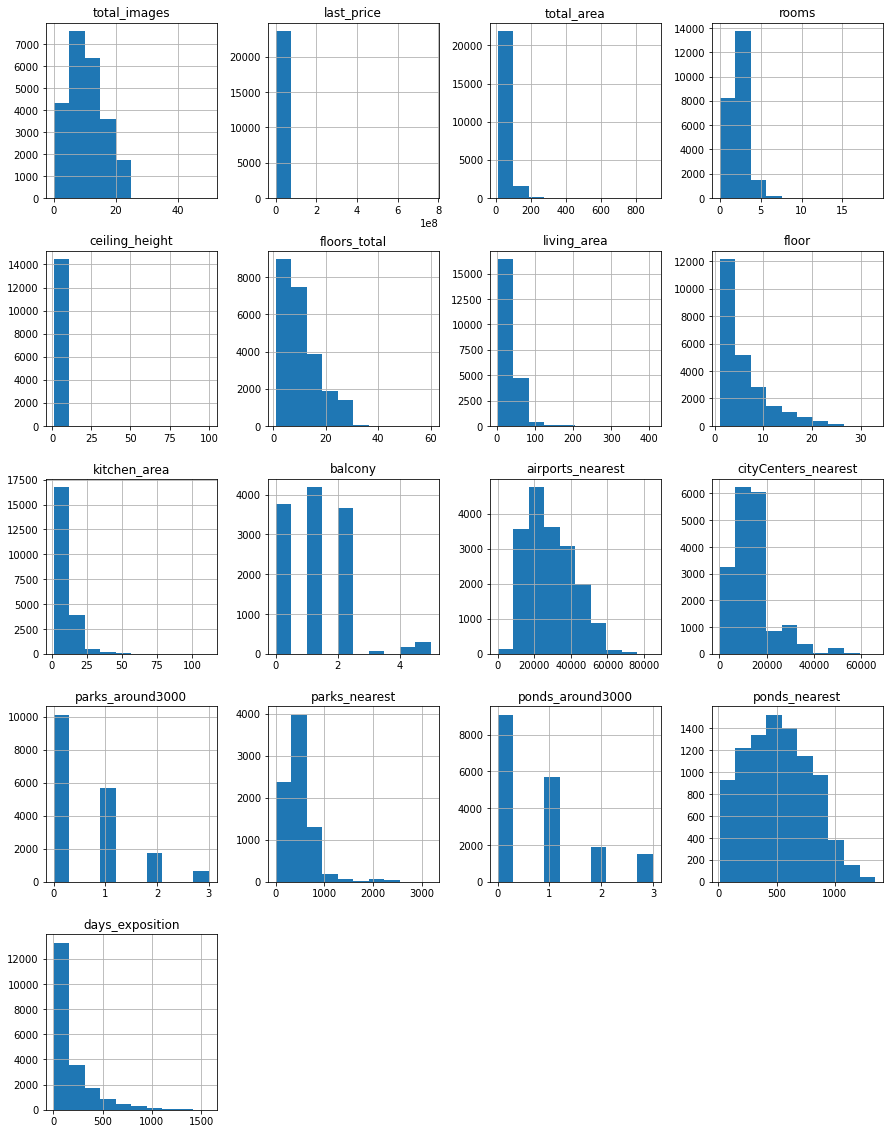

In [270]:
data.hist(figsize=(15, 20));

### Предобработка данных

**2.1. Обработка пропущенных значений в столбцах.**

In [271]:
# количество пропущенных значений для каждого столбца:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения. 

Столбец `balcony` содержит информацию о количестве балконов, пропуски в столбце `balcony` вероятнее всего связаны с их отсутствием, поэтому заменим их на нулевые значения. Также поступим с пропусками в столбце `is_apartment`, заменим пропуски на значение "False" т.к. здесь пропуски вероятнее всего связаны с тем, что объект не относится к данному параметру.

Пропуски в столбцах `living_area`, `kitchen_area` содержат информацию о жилой площади и площади кухни в квадратных метрах соответственно, т. к. жилая площадь и площадь кухни завиясят от планировки квартир, то заполним пропуски в данных столбцах медианным значением по аналогичным типам квартир, отобрав их по столбцу `rooms`, в котором хранится информация о количестве комнат в квартире.

Пропуски в столбце `ceiling_height` хранит данные о высота потолков в метрах. Так как высота потолков зависит от типа дома, то значения пропусков в данном столбце заполним медианным значением по подобным домам, отбрав их по столбцу `floors_total`, содержащему информацию об этажности дома.

Остальные параметры не зависят от типовых планировок домов и их значения не определить, исходя из данных аналогичных объектов. Данные также не содержат точных адресов квартир, что также не позволяет определить удаленность от других объектах, используя данные квартир с аналогичным адресом.

In [272]:
# замена пропусков в столбце, содержащем информацию о количестве балконов на 0:
data ['balcony'] = data ['balcony'].where(data ['balcony'] > 0, 0)
print (data ['balcony'].isna().sum())
data.value_counts('balcony')

0


balcony
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
dtype: int64

In [273]:
# замена пропусков в столбце, содержащем информацию о принадлежности к аппартаментам на "нет":
data ['is_apartment'] = data ['is_apartment'].fillna(False)
print (data ['is_apartment'].isna().sum())
data.value_counts('is_apartment')

0


is_apartment
False    23649
True        50
dtype: int64

In [274]:
# замена пропусков в столбце, содержащем информацию о жилой площади, на медианное значение по группе квартир, отобранных по количеству комнтат:
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == r), 'living_area'].median()
print (data ['living_area'].isna().sum())

# заполнение пропусков в столбце, содержащем информацию о площади кухни:
for r in data['rooms'].unique():
    if r > 0:
        data.loc[(data['rooms'] == r) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['rooms'] == r), 'kitchen_area'].median()
    else:
        data.loc[(data['rooms'] == r) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0
print (data ['kitchen_area'].isna().sum())

0
0


In [275]:
# замена пропусков в столбце, содержащем информацию о высоте потолков в метрах, на медианное значение по группе квартир, отобранных по общей этажности дома:
for ft in data['floors_total'].unique():
    data.loc[(data['floors_total'] == ft) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == ft), 'ceiling_height'].median()
data ['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


78

В 78 строках остались пропуски в столбце `ceiling_height`, т.к. в них присутствуют также пропуски в столбце `floors_total`. Чтобы пропуски в столбце `floors_total` не помешали в дальнейших вычислениях, удалим строки с ними.

In [276]:
data = data.dropna(subset=['floors_total'])

In [277]:
#количество пропущенных значений в столбцах после их обработки:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Получилось полностью устранить пропуски в 4 (`balcony`, `is_apartment`, `living_area` и `kitchen_area`) и свести к минимуму количество пропусков еще в 1 столбце (`ceiling_height`).

Пропуски в первой части данных могут быть связаны с тем, что пользователи не заполняют все данные в объявлениях.
Во второй части данных пропуски связаны с тем, что геосервисы не смогли точно определить местоположение объекта.

**2.2. Типы данных в столбцах:**

Информация о столбцах выявила следующие типы данных, которые следует изменить:

1) столбец `first_day_exposition` имеет текстовый тип данных "object", при этом в нем отражена дата публикации, для последующих операции с датами данный столбец стоит перевести в тип даты "date";

2) столбцы `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` имеют вещественный тип данных, при этом количество этажей/балконов/прудов/парков всегда обозначаются целымы числами, поэтому имеет смысл поменять тип данных в этих столбцах с "float64" на "int64";

3) столбец `is_apartment` имеет текстовый тип данных "object", при этом данные в нем принимают значения True, False либо отстутствуют, таким значениям больше подходит тип данных "bool";

4) в столбце `days_exposition` указаны целые значения дней, поэтому здесь также имеет смысл поменять тип данных с "float64" на "int64".

In [278]:
# преобразование типа данных в выбранных столбцах
data ['first_day_exposition'] = pd.to_datetime(data ['first_day_exposition'], format='%Y-%m-%d')
data ['floors_total'] = data ['floors_total'].astype(int, errors='ignore')
data ['is_apartment'] = data ['is_apartment'].astype(bool)
data ['balcony'] = data ['balcony'].astype('int')
data [['parks_around3000', 'ponds_around3000', 'days_exposition']] = data [['parks_around3000', 'ponds_around3000', 'days_exposition']].astype(int, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Тип данных в столбцах `first_day_exposition`, `balcony` и `is_apartment` перевели в более подходящий значениям тип.

Измениться типам данных в столбцах `floors_total`, `parks_around3000`, `ponds_around3000` помешали пропуски в столбцах. Так как вычисления можно производить и с вещественными типами данных, оставим тип данных в этих столбцах = "float64".

In [279]:
# проверка наличия дубликатов:
data.duplicated().sum()

0

**2.3. Выявление неявных дубликатов.**

Замена буквы "ё" на "е" в наименованиях населенных пунктов, приведеник обозначения населенных пунктов в единный тип:

In [280]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок при железнодорожной станции', 'поселок станции', 'поселок городского типа', 'городской поселок', 'коттеджный поселок'], 'поселок', regex=True)
    .replace(['Кудрово', 'Любань', 'Мурино', 'Никольское'], ['деревня Кудрово', 'поселок Любань', 'поселок Мурино', 'село Никольское'])
) 
# проверка оставшихся наименований, вывод отсортированного по алфавиту списка:
sorted_values = data['locality_name'].sort_values() 
sorted_values.unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка', 'деревня Гарболово',
       'деревня Глинка', 'де

### Добавление новых значений

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (как отношение стоимости объекта к его общей площади);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [281]:
data ['price_1m'] = (data ['last_price'] / data ['total_area']).round(2)
data ['weekday_1exposition'] = pd.DatetimeIndex (data ['first_day_exposition']).weekday
data ['month_1exposition'] = pd.DatetimeIndex (data ['first_day_exposition']).month
data ['year_1exposition'] = pd.DatetimeIndex (data ['first_day_exposition']).year

def floor_type (n):
    try: 
        if n == 1:
            return 'первый'
        elif n == data.loc[n, 'floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'не определен'
data ['floor_type'] = data ['floor'].apply(floor_type)
print (data ['floor_type'].unique())

data ['city_center_near_km'] = (data ['cityCenters_nearest'] / 1000).round(0) 

data.head()


['другой' 'первый' 'последний']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,последний,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Исследовательский анализ данных

**4.1. Изучение следующих параметров объектов на наличие в них редких и выбивающиxся значений:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка


**Общая площадь, жилая площадь и площадь кухни.**

In [282]:
# описание данных в столбце 'общая площадь', 'жилая площадь' и 'площадь кухни'
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23613.000000,23613.000000,23613.000000
mean,60.340678,34.332019,10.375389
std,35.648988,21.712677,5.722762
min,12.000000,2.000000,0.000000
25%,40.000000,18.400000,7.200000
50%,52.000000,30.300000,9.040000
75%,69.800000,42.700000,11.500000
max,900.000000,409.700000,112.000000


Общая площадь:

Text(0.5, 0, 'Общая площадь, кв. м')

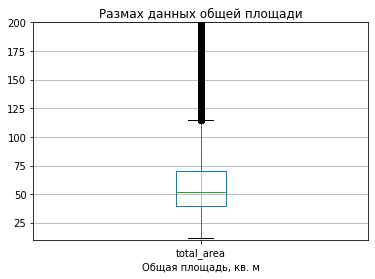

In [283]:
data.boxplot ('total_area')
plt.ylim(10, 200)
plt.title ('Размах данных общей площади')
plt.xlabel ('Общая площадь, кв. м')

Данные показывают, что квартиры, выставленные на продажу имеет площадь от 12 до 900 кв.м., половина квартир при этом имеют площадь от 40 до 70 кв.м. Средняя общая площадь квартир = 60,34 кв.м., медианное значение общей площади = 52 кв.м., редкие выбивающиеся значения сместили значение средней площади в большую сторону. 

In [284]:
# доля квартир слишком большой и слишком малой площади:
data ['too_big'] = data['total_area'] > 160.0
data ['too_small'] = data['total_area'] < 20.0
print ('Доля слишком больших квартир в %:', data ['too_big'].mean().round(4)*100)
print ('Доля слишком маленьких квартир в %:',data ['too_small'].mean().round(4)*100)

print ('Количество слишком больших квартир:', data ['too_big'].sum())
print ('Количество слишком маленьких квартир:', data ['too_small'].sum())

Доля слишком больших квартир в %: 1.91
Доля слишком маленьких квартир в %: 0.11
Количество слишком больших квартир: 451
Количество слишком маленьких квартир: 27


Text(0, 0.5, 'Количество')

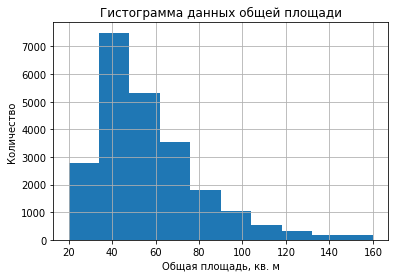

In [285]:
data['total_area'].hist(range=(20, 160))
plt.title ('Гистограмма данных общей площади')
plt.xlabel ('Общая площадь, кв. м')
plt.ylabel ('Количество')

Так как квартиры площадью менее 20 кв. м. и более 160 кв. м. относятся к редким, то удалим их из итоговой таблицы:

In [286]:
data_stat = data.query('160 > total_area > 20')
data_stat.sort_values('total_area').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small
13694,2,31099000.0,159.0,2018-06-25,5,3.28,5,106.0,5,False,...,426.0,NaN,195591.19,0,6,2018,другой,0.0,False,False
17692,1,15782000.0,159.0,2015-10-27,2,2.80,3,43.0,1,False,...,278.0,272.0,99257.86,1,10,2015,первый,29.0,False,False
5956,10,25600000.0,159.3,2014-12-09,4,2.80,8,86.6,3,False,...,NaN,NaN,160703.08,1,12,2014,другой,11.0,False,False
3680,20,29999000.0,159.9,2019-03-18,5,3.25,6,109.4,5,False,...,NaN,NaN,187611.01,0,3,2019,другой,4.0,False,False
13344,9,15190500.0,159.9,2019-03-12,5,3.00,6,122.1,4,False,...,NaN,NaN,95000.00,1,3,2019,другой,3.0,False,False


In [287]:
# изменение основные показатенли площадей:
data_stat [['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23111.000000,23111.000000,23111.000000
mean,57.006756,32.504945,10.084208
std,23.706869,15.744999,4.936949
min,20.100000,2.000000,0.000000
25%,40.000000,18.300000,7.100000
50%,51.300000,30.000000,9.040000
75%,68.000000,42.000000,11.200000
max,159.900000,145.000000,93.000000


Жилая площадь и площадь кухни.

В значениях столбцов 'жилая площадь' и 'площадь кухни' после удаления выбивающихся значений в столбце 'общая площадь' уже нет значительных отклонений в данных. Вместе с тем интерес вызывают минимальные значения: если показатель площади кухни = 0 кв. м. можно учесть, принимая во внимание, что в квартирах с совмещенными кухнями-гостинными площадь кухни не считается, то показатель жилой площади = 2 кв.м. в квартирах вызывает сомнения.    

Text(0, 0.5, 'Общая площадь, кв. м')

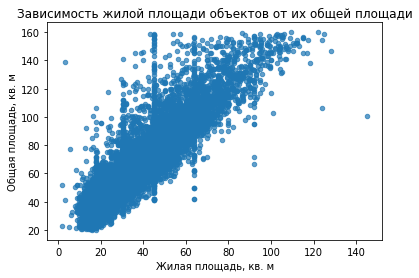

In [288]:
# зависимость жилой площади объектов от общей площади объектов
data_stat.plot (x='living_area', y='total_area', kind='scatter', alpha=0.7)
plt.title ('Зависимость жилой площади объектов от их общей площади')
plt.xlabel ('Жилая площадь, кв. м')
plt.ylabel ('Общая площадь, кв. м')

При общей тенденции к прямой зависимоти показателей жилой и общей площадей квартир есть выбивающиеся значения, например жилая площадь менее 10 кв.м. при общей площади более 130 кв.м.

Проверим, нет ли аномалий в данных c площадями, когда общая плащадь квартиры меньше, чем сумма жилой площади и площади кухни. Аномалии менее 1.5 кв. м. опустим, т.к. в данном случае имеет место быть неточность в округлении при их заполнении, когда пользователь не указывает цифры после запятой в показателях.  

In [289]:
data_area_anom = (
    data_stat[['total_area', 'living_area', 'kitchen_area']]
    .query('(kitchen_area + living_area - total_area) > 1.5')
    .sort_values('living_area')
)
data_area_anom

,total_area,living_area,kitchen_area
10725,25.60,14.170,14.17
1655,22.00,14.500,9.04
13496,20.67,14.850,9.04
9395,21.30,14.920,9.04
7755,20.67,14.950,14.95
...,...,...,...
14388,95.00,91.785,15.10
17069,100.00,91.785,15.10
20256,102.70,101.000,19.50
14649,106.00,123.900,19.50


В 199 строках обнаружены аномалии. Проверим, не связаны ли аномалии с тем, что пользователи перепутали значения в столбцах 'total_area' и 'living_area'.

In [290]:
data_area_anom.query('(kitchen_area + total_area - living_area) < 1.5').sort_index()

,total_area,living_area,kitchen_area
9964,49.5,63.600,11.1
12186,71.4,91.785,15.1
12827,67.0,91.785,15.1
13034,42.0,63.600,11.1
14603,100.6,145.000,20.0
17083,50.0,63.600,11.1
17472,50.0,63.600,11.1
20102,42.0,63.600,11.1


В 8 строках значения явно перепутаны местами - восстановим их корректные значения. Остальные строки с аномальными значениями удалим.

In [291]:
data_stat.loc[9964, ('total_area', 'living_area')] = 63.6, 49.5
data_stat.loc[12186, ('total_area', 'living_area')] = 91.785, 71.4
data_stat.loc[12827, ('total_area', 'living_area')] = 91.785, 67.0
data_stat.loc[13034, ('total_area', 'living_area')] = 63.6, 42.0
data_stat.loc[14603, ('total_area', 'living_area')] = 145.0, 100.6
data_stat.loc[17083, ('total_area', 'living_area')] = 63.6, 50.0
data_stat.loc[17472, ('total_area', 'living_area')] = 63.6, 50.0
data_stat.loc[20102, ('total_area', 'living_area')] = 63.6, 42.0
data_stat.loc[[9964, 12186, 12827, 13034, 14603, 17083, 17472, 20102]]

data_stat.loc[[9964, 12186, 12827, 13034, 14603, 17083, 17472, 20102]]


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small
9964,5,3500000.0,63.600,2018-10-02,4,2.55,5,49.5,1,False,...,96.0,63.0,70707.07,1,10,2018,первый,11.0,False,False
12186,1,4900000.0,91.785,2017-09-21,5,2.60,9,71.4,7,False,...,NaN,133.0,68627.45,3,9,2017,другой,15.0,False,False
12827,7,5250000.0,91.785,2018-02-16,5,2.50,5,67.0,1,False,...,568.0,81.0,78358.21,4,2,2018,первый,10.0,False,False
13034,11,2350000.0,63.600,2018-03-25,4,2.50,5,42.0,2,False,...,NaN,44.0,55952.38,6,3,2018,другой,NaN,False,False
14603,12,13490000.0,145.000,2018-07-31,7,3.00,4,100.6,2,True,...,325.0,50.0,134095.43,1,7,2018,другой,4.0,False,False
17083,16,2500000.0,63.600,2018-02-22,4,2.55,5,50.0,4,False,...,NaN,44.0,50000.00,3,2,2018,другой,NaN,False,False
17472,4,4300000.0,63.600,2018-02-20,4,2.50,5,50.0,5,False,...,NaN,45.0,86000.00,1,2,2018,другой,18.0,False,False
20102,11,2350000.0,63.600,2018-02-15,4,2.60,5,42.0,2,False,...,NaN,45.0,55952.38,3,2,2018,другой,NaN,False,False


In [292]:
data_stat['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [293]:
data_stat = data_stat.query('(kitchen_area + living_area - total_area) < 1.5')

In [294]:
# объекты с жилой площадью в 3 раза менее общей площади без учета площади кухни:
data_stat[['total_area', 'living_area', 'kitchen_area', 'is_apartment']].query('(total_area > (3 * living_area + kitchen_area)) and is_apartment == False').sort_values('living_area')

,total_area,living_area,kitchen_area,is_apartment
13915,52.0,2.0,9.0,False
21758,23.0,2.0,0.0,False
23574,139.0,3.0,16.0,False
3242,41.0,3.0,11.0,False
17582,22.0,5.0,0.0,False
...,...,...,...,...
14720,146.0,45.0,9.5,False
21143,158.0,45.0,15.0,False
3159,155.2,45.0,9.5,False
11607,158.0,45.0,9.5,False


63 объявления имеют нехарактерные для квартир характеристики. Их лучше удалить, т.к. они не относятся к аппартаментам.

In [295]:
data_stat = data_stat.query('total_area < (3 * living_area + kitchen_area) or is_apartment == True')
data_stat [['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22854.000000,22854.000000,22854.000000
mean,57.068122,32.519363,10.069777
std,23.572417,15.685384,4.922622
min,20.300000,6.000000,0.000000
25%,40.000000,18.300000,7.100000
50%,51.400000,30.000000,9.040000
75%,68.000000,42.000000,11.200000
max,159.900000,128.000000,93.000000


array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>, <AxesSubplot:>]],
      dtype=object)

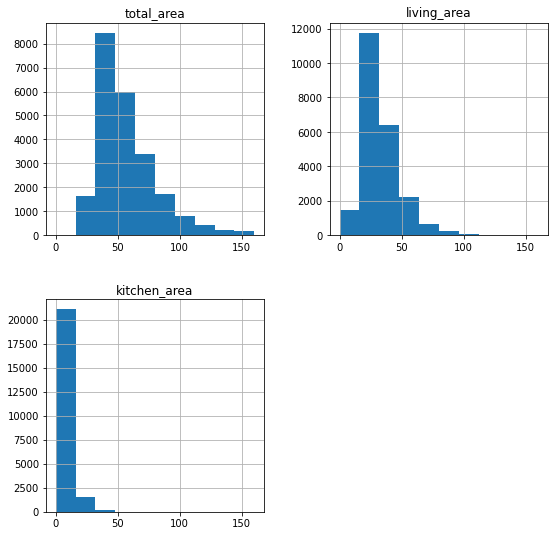

In [296]:
# гистограммы для столбцов, характеризующих плолщади объектов:
data_stat[['total_area', 'living_area', 'kitchen_area']].hist(range= (0, 160), figsize=(9, 9))

Наиболее чаще в объявлениях встречаются квартиры общей площадью от 40 до 68 кв. м, жилой площадью от 18 до 42 кв. м и площадью кухни от 7 до 11 кв. м.

**Цена объектов.**

Посмотрим общее описание данных в столбцах, содержащих информацию о цене объектов. На предмет наличия аномальных значений проанализируем столбец, содержащей информацию о цене за 1 кв.м.

In [297]:
data_stat [['last_price', 'price_1m']].describe()

,last_price,price_1m
count,2.285400e+04,22854.000000
mean,5.767315e+06,97445.769460
std,4.709551e+06,41568.986544
min,1.219000e+04,111.830000
25%,3.400000e+06,76190.480000
50%,4.600000e+06,94578.675000
75%,6.590000e+06,113298.695000
max,1.240000e+08,995983.940000


Text(0.5, 0, 'Цена за 1 кв.м')

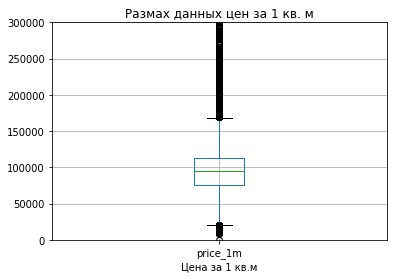

In [298]:
data_stat.boxplot('price_1m')
plt.ylim (0, 300000)
plt.title ('Размах данных цен за 1 кв. м')
plt.xlabel ('Цена за 1 кв.м')

Оценим выбивающиеся значения: квартиры стоимостью выше 190000 р. за кв.м. и ниже 20 000 р. за кв.м.

In [299]:
data_stat['too_exp'] = data_stat['price_1m'] > 190000.0
data_stat['too_cheap'] = data_stat['price_1m'] < 20000.0
print ('Доля слишком дорогих квартир в %:', data_stat ['too_exp'].mean().round(4)*100)
print ('Доля слишком дешевых квартир в %:',data_stat ['too_cheap'].mean().round(4)*100)

print ('Количество слишком дорогих квартир:', data_stat ['too_exp'].sum())
print ('Количество слишком дешевых квартир:', data_stat ['too_cheap'].sum())

Доля слишком дорогих квартир в %: 2.08
Доля слишком дешевых квартир в %: 0.72
Количество слишком дорогих квартир: 475
Количество слишком дешевых квартир: 164


In [300]:
data_stat[data_stat['too_cheap']==True].sort_values('price_1m')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,111.83,2,3,2019,другой,9.0,False,False,False,True
14911,5,430000.0,54.0,2018-06-26,2,2.80,3,30.5,3,False,...,7962.96,1,6,2018,другой,NaN,False,False,False,True
4405,9,500000.0,52.0,2018-08-02,2,2.70,2,31.0,1,False,...,9615.38,3,8,2018,первый,NaN,False,False,False,True
11351,17,550000.0,54.0,2019-02-07,2,3.00,2,40.0,1,False,...,10185.19,3,2,2019,первый,NaN,False,False,False,True
9581,7,450000.0,43.4,2018-08-31,2,2.55,5,30.3,3,False,...,10368.66,4,8,2018,другой,NaN,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,6,800000.0,40.3,2018-06-25,2,2.80,3,30.5,1,False,...,19851.12,0,6,2018,первый,NaN,False,False,False,True
487,19,1300000.0,65.4,2018-11-04,3,2.50,5,49.3,2,False,...,19877.68,6,11,2018,другой,NaN,False,False,False,True
1358,10,550000.0,27.6,2019-03-06,1,2.50,5,17.0,2,False,...,19927.54,2,3,2019,другой,NaN,False,False,False,True
12967,4,950000.0,47.6,2018-07-03,2,2.70,2,32.4,1,False,...,19957.98,1,7,2018,первый,NaN,False,False,False,True


В строке 8793 очевидно, что цена указана в тыс. руб. вместо руб., изменим значение в данной строке. Остальные строки удалим, т. к. количество выбивающихся значений незначительно и при этом не являются показательными.

In [301]:
data_stat.loc [8793, ['last_price', 'price_1m']] = 12190000.0, 12190000.0/109.0
data_stat.loc [8793, ['last_price', 'price_1m']]

last_price       12190000.0
price_1m      111834.862385
Name: 8793, dtype: object

In [302]:
data_stat = data_stat.query('20000 <= price_1m <= 190000')
data_stat['price_1m'].describe()

count     22216.000000
mean      94455.636143
std       29807.142585
min       20000.000000
25%       76190.480000
50%       94117.650000
75%      111904.995000
max      190000.000000
Name: price_1m, dtype: float64

Text(0, 0.5, 'Количество объектов')

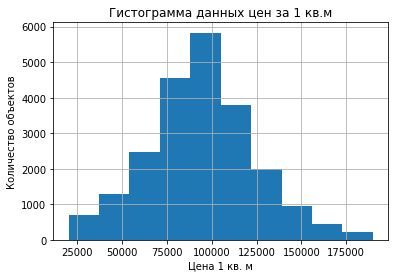

In [303]:
data_stat['price_1m'].hist()
plt.title ('Гистограмма данных цен за 1 кв.м')
plt.xlabel ('Цена 1 кв. м')
plt.ylabel ('Количество объектов')

Чаще всего в объявлениях встречаются квартиры стоимостью от 76 до 112 тыс.руб. за 1 кв. м.

**Количество комнат.**

In [304]:
data_stat['rooms'].value_counts()

1    7726
2    7617
3    5465
4    1001
5     187
0     179
6      30
7      10
8       1
Name: rooms, dtype: int64

Из значений нелогичным выглядит только количество комнат = 0. 

Проверим, обозначены ли таким образом квартиры-студии:  

In [305]:
data_stat[data_stat['studio']==True]['rooms'].value_counts()

0    123
1      7
Name: rooms, dtype: int64

Гипотеза была верна: '0' обозначают студии. При этом в 7 объявлениях либо неправильно указана принадлежность объектов к студиям, либо в них неправильно указано количество комнат и в 56 объявлениях объекты не относятся к студиям, хотя количество в столбце количество комнат указан '0'. Рассчитаем среднюю площадь для каждого из типов квартир по количеству комнат: 

In [306]:
data_stat[data_stat['rooms']==0]['total_area'].max()

98.4

In [307]:
print('Средняя площадь студии:', data_stat[data_stat['rooms']==0]['total_area'].mean().round())
print('Средняя площадь 1-к.кв.:', data_stat[data_stat['rooms']==1]['total_area'].mean().round())
print('Средняя площадь 2-к.кв.:', data_stat[data_stat['rooms']==2]['total_area'].mean().round())

Средняя площадь студии: 28.0
Средняя площадь 1-к.кв.: 38.0
Средняя площадь 2-к.кв.: 55.0


In [308]:
data_stat.query('studio == True and rooms!=0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
2389,5,2250000.0,25.41,2016-06-07,1,2.65,12,17.08,8,False,...,88547.82,1,6,2016,другой,13.0,False,False,False,False
3187,13,3800000.0,27.00,2016-05-17,1,2.60,14,18.00,8,False,...,140740.74,1,5,2016,другой,16.0,False,False,False,False
4180,4,4500000.0,34.00,2016-04-25,1,2.80,10,21.00,10,False,...,132352.94,0,4,2016,другой,5.0,False,False,False,False
11026,1,2800000.0,28.00,2016-05-04,1,2.66,26,19.00,6,False,...,100000.00,2,5,2016,другой,20.0,False,False,False,False
12935,10,2200000.0,31.00,2016-05-15,1,2.50,8,22.30,5,False,...,70967.74,6,5,2016,другой,NaN,False,False,False,False
20086,0,1550000.0,22.00,2016-05-11,1,2.70,15,10.94,14,False,...,70454.55,2,5,2016,другой,NaN,False,False,False,False
22652,5,2650000.0,26.00,2015-06-24,1,2.60,14,15.00,11,False,...,101923.08,2,6,2015,другой,NaN,False,False,False,False


Исходя из сравнения площадей объектов и средних площадей, все объекты, кроме объекта с индексом 4180, ближе по значению площадей к студиям, объект с индексом 4180 больше по параметрам подходит к 1-к. квартире. Заменим значения в соответствии со сделанными выводами.

In [309]:
data_stat.loc [4180, 'studio'] = False
data_stat.loc [[2389, 3187, 11026, 12935, 20086, 22652], 'rooms'] = 0
data_stat.loc [[2389, 3187, 11026, 12935, 20086, 22652]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
2389,5,2250000.0,25.41,2016-06-07,0,2.65,12,17.08,8,False,...,88547.82,1,6,2016,другой,13.0,False,False,False,False
3187,13,3800000.0,27.00,2016-05-17,0,2.60,14,18.00,8,False,...,140740.74,1,5,2016,другой,16.0,False,False,False,False
11026,1,2800000.0,28.00,2016-05-04,0,2.66,26,19.00,6,False,...,100000.00,2,5,2016,другой,20.0,False,False,False,False
12935,10,2200000.0,31.00,2016-05-15,0,2.50,8,22.30,5,False,...,70967.74,6,5,2016,другой,NaN,False,False,False,False
20086,0,1550000.0,22.00,2016-05-11,0,2.70,15,10.94,14,False,...,70454.55,2,5,2016,другой,NaN,False,False,False,False
22652,5,2650000.0,26.00,2015-06-24,0,2.60,14,15.00,11,False,...,101923.08,2,6,2015,другой,NaN,False,False,False,False


In [310]:
# в строках с количеством комнат = 0 и неустановленным признаком студии при площади менее 33 кв.м поставим флаг студии = True
for typ in data_stat['studio'].unique():
    data_stat.loc[(data_stat['studio'] == typ) & (data_stat['rooms'] == 0) & (data_stat['total_area'] < 33.00), 'studio'] = True

In [311]:
# проверим оставшиеся аномалии
data_stat.query('studio == False and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
508,0,3375000.0,34.40,2017-03-28,0,2.66,26,24.3,19,False,...,98110.47,1,3,2017,другой,19.0,False,False,False,False
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.0,3,False,...,54285.71,4,4,2017,другой,NaN,False,False,False,False
4683,2,3650000.0,35.00,2018-02-01,0,2.75,25,23.4,25,False,...,104285.71,3,2,2018,другой,12.0,False,False,False,False
7237,8,2999000.0,42.63,2017-11-27,0,2.70,16,25.7,2,False,...,70349.52,0,11,2017,другой,NaN,False,False,False,False
21628,9,3900000.0,34.00,2017-03-18,0,2.75,20,24.0,10,False,...,114705.88,5,3,2017,другой,14.0,False,False,False,False


Все оставшиеся объявления с аномальными значениями имеют общие площади от 33 до 46.5 кв. м, характерные для однокомнатных квартир. Заменим в них значения в столбце с количеством комнат на '1'.

In [312]:
data_stat.loc[[508, 839, 4683, 7237, 21628], 'rooms'] = 1
data_stat.loc[[508, 839, 4683, 7237, 21628]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
508,0,3375000.0,34.40,2017-03-28,1,2.66,26,24.3,19,False,...,98110.47,1,3,2017,другой,19.0,False,False,False,False
839,14,1900000.0,35.00,2017-04-14,1,2.70,5,15.0,3,False,...,54285.71,4,4,2017,другой,NaN,False,False,False,False
4683,2,3650000.0,35.00,2018-02-01,1,2.75,25,23.4,25,False,...,104285.71,3,2,2018,другой,12.0,False,False,False,False
7237,8,2999000.0,42.63,2017-11-27,1,2.70,16,25.7,2,False,...,70349.52,0,11,2017,другой,NaN,False,False,False,False
21628,9,3900000.0,34.00,2017-03-18,1,2.75,20,24.0,10,False,...,114705.88,5,3,2017,другой,14.0,False,False,False,False


In [313]:
print (data_stat[data_stat['studio']==True]['rooms'].value_counts())
data_stat['rooms'].value_counts()

0    180
Name: rooms, dtype: int64


1    7725
2    7617
3    5465
4    1001
5     187
0     180
6      30
7      10
8       1
Name: rooms, dtype: int64

Text(0, 0.5, 'Количество объектов')

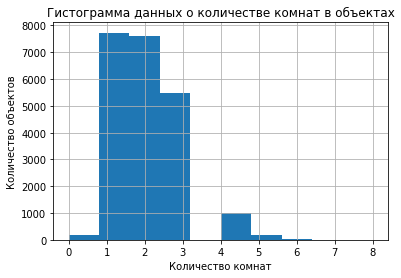

In [314]:
#пострим гистограмму
data_stat['rooms'].hist()
plt.title ('Гистограмма данных о количестве комнат в объектах')
plt.xlabel ('Количество комнат')
plt.ylabel ('Количество объектов')

Больше всего объявлений о продаже однокомнатных и двухкомнатных квартир (свыше 7 тыс. в каждой категории), следующая значительная категория  - трехкомнатные квартиры (ок. 5.4 тыс.). Около 1 тыс. объявлений о продаже четырехкомнатных квартир. Остальные категории представлены в малом количестве (200 объявлений и менее).  

**Высота потолков.**

Посмотрим общее описание данных в столбце, содержащем информацию о высоте потолков. На предмет наличия аномальных значений проанализируем столбец, содержащей информацию о цене за 1 кв.м.

In [315]:
data_stat['ceiling_height'].describe()

count    22215.000000
mean         2.716663
std          0.749484
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

In [316]:
data_stat[data_stat['ceiling_height'] < 2.5].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
22590,16,6000000.0,55.00,2018-10-31,2,1.00,12,32.4,7,False,...,109090.91,2,10,2018,другой,14.0,False,False,False,False
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.5,1,False,...,35046.73,0,8,2017,первый,NaN,False,False,False,False
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.4,5,False,...,102500.00,1,10,2017,другой,20.0,False,False,False,False
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5,17.6,5,False,...,46478.87,1,5,2018,другой,NaN,False,False,False,False
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.5,6,False,...,89522.39,3,3,2017,другой,12.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,5,3450000.0,42.90,2017-10-27,2,2.48,5,26.8,5,False,...,80419.58,4,10,2017,другой,9.0,False,False,False,False
5735,4,4349000.0,48.90,2015-12-13,2,2.48,12,31.0,3,False,...,88936.61,6,12,2015,другой,13.0,False,False,False,False
3703,14,4000000.0,36.44,2018-04-15,1,2.48,9,19.8,2,False,...,109769.48,6,4,2018,другой,11.0,False,False,False,False
1677,3,2990000.0,36.10,2018-04-26,1,2.48,12,18.3,4,False,...,82825.48,3,4,2018,другой,47.0,False,False,False,False


Так как по нормам высота потолков в жилых помещениях не должен быть ниже 2.5 м, объявления с высотой потолков ниже данного значения считаем за аномалии и исключаем из выборки:

In [317]:
data_stat = data_stat[data_stat['ceiling_height'] >= 2.5]
# самые высокие потолки:
data_stat[data_stat['ceiling_height'] > 5].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_1m,weekday_1exposition,month_1exposition,year_1exposition,floor_type,city_center_near_km,too_big,too_small,too_exp,too_cheap
12628,14,3900000.0,50.0,2018-03-29,1,5.30,5,17.6,5,False,...,78000.00,3,3,2018,другой,4.0,False,False,False,False
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5,68.0,5,False,...,115492.96,4,7,2017,другой,1.0,False,False,False,False
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,46666.67,4,3,2018,другой,NaN,False,False,False,False
17442,0,5350000.0,54.0,2015-06-16,2,8.00,5,29.0,2,False,...,99074.07,1,6,2015,другой,28.0,False,False,False,False
15743,14,5600000.0,67.0,2016-11-11,3,8.00,16,41.0,1,False,...,83582.09,4,11,2016,первый,11.0,False,False,False,False
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,125555.56,2,8,2018,другой,11.0,False,False,False,False
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16,15.5,15,False,...,117777.78,5,9,2017,другой,12.0,False,False,False,False
15061,19,5600000.0,56.4,2018-05-11,2,14.00,14,32.4,5,False,...,99290.78,4,5,2018,другой,14.0,False,False,False,False
397,15,5990000.0,54.0,2018-03-22,2,14.85,36,21.4,28,False,...,110925.93,3,3,2018,другой,20.0,False,False,False,False
17496,15,6700000.0,92.9,2019-02-19,3,20.00,17,53.2,14,False,...,72120.56,1,2,2019,другой,15.0,False,False,False,False


Высота потолков 25 м и 32 м похоже на неверное написание 2.5 м и 3.2 м. Скорректируем эти значения. 

In [318]:
# замена значений
data_stat.update(data_stat[(data_stat['ceiling_height'] >= 25) & (data_stat['ceiling_height'] <= 36)]['ceiling_height']/10)
data_stat['ceiling_height'].unique()

array([ 2.7 ,  2.75,  2.55,  3.03,  2.65,  2.66,  2.5 ,  2.67,  2.56,
        3.  ,  2.6 ,  3.05,  2.8 ,  2.9 ,  2.61,  3.2 ,  3.25,  3.45,
        2.77,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.73,  2.84,
        3.1 ,  3.4 ,  3.5 ,  2.72,  2.54,  2.51,  2.78,  2.76,  2.58,
        3.7 , 14.85,  2.52,  2.87,  2.59,  2.85,  2.92,  3.11,  3.13,
        3.8 ,  3.15,  3.55,  3.62,  3.12,  2.53,  2.74,  2.79,  2.95,
        4.06,  2.94,  3.54,  2.83,  3.38,  3.01,  3.65,  3.18,  3.35,
        2.62,  3.57,  2.82,  3.98,  2.63,  3.83,  3.52,  2.88,  3.67,
        4.19,  3.95,  3.24,  4.5 ,  4.2 ,  3.75,  3.36,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.16,  3.6 ,  3.26,  3.34,  2.81,  3.44,
        4.37,  3.9 ,  3.27,  4.1 ,  2.68,  2.93,  3.46, 24.  ,  3.47,
        3.63,  3.14,  3.33,  3.32,  8.3 ,  2.98,  2.86,  3.08,  3.17,
        3.28,  3.04,  3.66,  3.23,  2.97,  3.02,  3.21,  2.96,  3.78,
        4.3 ,  3.06,  3.39,  2.69,  4.4 ,  3.22,  5.3 ,  3.56,  3.85,
        3.53,  3.93,

Строки с индексами 12628, 21227, 3474, 15743, 17442, 5863, 22309, 15061, 397, 17496, 20507 и 5076 так не перевести, т.к. они примут значения ниже нормы. Удалим эти строки как редкие выбивающиеся значения:

In [319]:
data_stat = data_stat.query('ceiling_height <= 5')

In [320]:
# общее описание столбца, содержащего информацию о высоте потолков:
data_stat['ceiling_height'].describe()

count    22131.000000
mean         2.694261
std          0.210415
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.700000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество объектов')

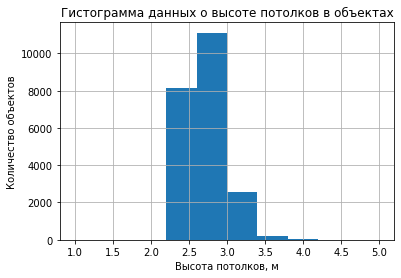

In [321]:
# построим гистограмму
data_stat['ceiling_height'].hist(range=(1, 5))
plt.title ('Гистограмма данных о высоте потолков в объектах')
plt.xlabel ('Высота потолков, м')
plt.ylabel ('Количество объектов')

В объявлениях размещены объекты с высотой потолков от 2.5 до 4.7 кв.м, ,большая часть из которых имеет потолки высотой от 2.5 до 3.0 кв. м.

**Тип этажей и количество этажей в доме.**

В столбце `floor_type` объекты в объявлениях разделены на 3 типа в зависимости от их расположениях: на первом этаже, на последнем этаже или на любом другой этаже дома. Посмотрим статистику по объектам в зависимости от этажа, на котором они расположены, и построим гистограмму.  

In [322]:
data_stat.value_counts('floor_type')

floor_type
другой       18164
первый        2745
последний     1222
dtype: int64

Text(0, 0.5, 'Количество объектов')

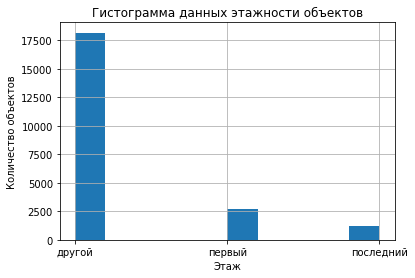

In [323]:
data_stat['floor_type'].hist()
plt.title ('Гистограмма данных этажности объектов')
plt.xlabel ('Этаж')
plt.ylabel ('Количество объектов')

In [324]:
print ('Меньше всего объявлений с объектами, расположенными на последнем этаже, (', int((1222/22131)*100), '% от общего числа объявлений);', \
      'объявлений о продаже квартир на первом этаже больше в 2 раза (', int((2745/22131)*100), '% от общего числа объявлений).', \
      'Самая многочисленная группа - объявления о продаже квартир, которые расположены ни на первом, ни на последнем этажах (', int((18164/22131)*100), '% от общего числа объявлений).')

Меньше всего объявлений с объектами, расположенными на последнем этаже, ( 5 % от общего числа объявлений); объявлений о продаже квартир на первом этаже больше в 2 раза ( 12 % от общего числа объявлений). Самая многочисленная группа - объявления о продаже квартир, которые расположены ни на первом, ни на последнем этажах ( 82 % от общего числа объявлений).


Посмотрим в домах какой этажности расположены объекты в объявлениях.

In [325]:
data_stat ['floors_total'].describe()

count    22131.000000
mean        10.814423
std          6.628400
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0, 0.5, 'Количество этажей в доме')

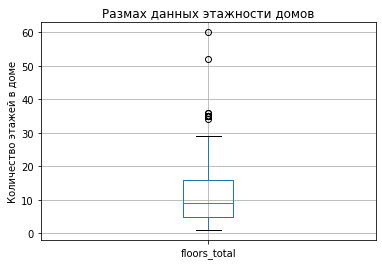

In [326]:
data_stat.boxplot('floors_total')
plt.title ('Размах данных этажности домов')
plt.ylabel ('Количество этажей в доме')

In [327]:
# диаграмма размаха показала, что этажи выше 30 являются редкими, посчитаем их количество: 
data_stat.query ('floors_total > 30').value_counts('floors_total')

floors_total
35    23
36     2
34     1
52     1
60     1
dtype: int64

Всего в 28 объявлениях представлены объекты, расположенные в домах, этажность которых выше 30. Удалим эту малочисленную группу из выборки.

In [328]:
data_stat = data_stat.query ('floors_total <= 30')

In [329]:
data_stat ['floors_total'].describe()

count    22103.000000
mean        10.781840
std          6.566099
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [330]:
data_stat.value_counts('floors_total')

floors_total
5     5430
9     3665
16    1324
12    1303
10    1102
4     1092
25    1045
17     810
6      763
3      599
14     537
7      484
18     481
24     450
15     345
23     337
2      327
19     315
8      283
22     281
20     255
13     218
11     181
27     162
21     152
26     123
28      21
1       17
29       1
dtype: int64

Text(0, 0.5, 'Количество объектов')

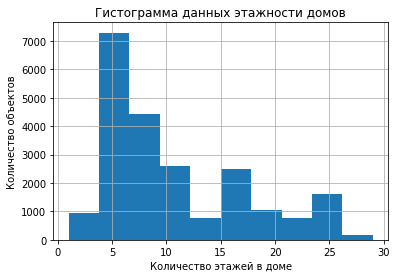

In [331]:
# диаграмма:
data_stat ['floors_total'].hist()
plt.title ('Гистограмма данных этажности домов')
plt.xlabel ('Количество этажей в доме')
plt.ylabel ('Количество объектов')

Диаграмма имеет несколько пиков: больше всего в объявлениях представлены объекты, расположенные в 5-этажных домах, (более 5 тыс. объявлений), следом идут объекты, расположенные в 9-этажных домах, (более 3.5 тыс. объявлений), также хорошо представлены объекты, расположенные в 16-, 12-, 10-, 4- и 25-этажных домах (более 1 тыс. объявлений в каждой из категории).

**Расстояние до центра города в метрах.**

In [332]:
data_stat ['cityCenters_nearest'].describe()

count    16913.000000
mean     14585.021818
std       8557.212474
min        208.000000
25%       9988.000000
50%      13330.000000
75%      16464.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [333]:
# исключение редких выбивающихся значений:
len(data_stat.query ('cityCenters_nearest >= 55000'))

12

In [334]:
data_stat = data_stat.query ('cityCenters_nearest < 55000 or cityCenters_nearest.isna()')

In [335]:
data_stat ['cityCenters_nearest'].describe()

count    16901.000000
mean     14551.004497
std       8464.073418
min        208.000000
25%       9976.000000
50%      13329.000000
75%      16461.000000
max      54926.000000
Name: cityCenters_nearest, dtype: float64

Text(0, 0.5, 'Количество объектов')

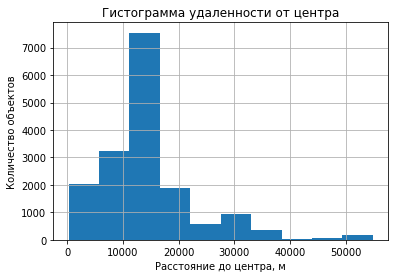

In [336]:
data_stat ['cityCenters_nearest'].hist()
plt.title ('Гистограмма удаленности от центра')
plt.xlabel ('Расстояние до центра, м')
plt.ylabel ('Количество объектов')

Среди тех объявлений, в которых определено расстояние до центра (16901 объявление), большая часть объектов расположены на удаленности от 9.9 до 16.5 км от центра города. 

**Расстояние до ближайшего парка.**

In [337]:
# основные характеристики данных в столбце с информацией о расстоянии до ближайщшего парка в метрах:
data_stat ['parks_nearest'].describe()

count    7268.000000
mean      491.589571
std       335.433846
min         1.000000
25%       291.000000
50%       456.000000
75%       613.250000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Расстояние до парка, м')

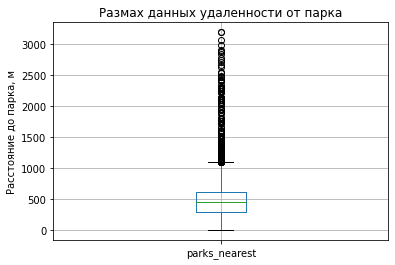

In [338]:
# диаграмма размаха данных в столбце с информацией о расстоянии до ближайщшего парка в метрах:
data_stat.boxplot('parks_nearest')
plt.title ('Размах данных удаленности от парка')
plt.ylabel ('Расстояние до парка, м')

In [339]:
# диаграмма размаха показала, что расстояние свыше 2500 являются совсем редкими, посчитаем их количество: 
data_stat.query ('parks_nearest > 2500')['parks_nearest'].count()

15

In [340]:
# удалим редкиие выбивающиеся значения:
data_stat = data_stat.query ('parks_nearest <= 2500  or parks_nearest.isna()')

In [341]:
# основные характеристики данных в столбце с информацией о расстоянии до ближайщшего парка в метрах после предобработки данных:
data_stat ['parks_nearest'].describe()

count    7253.000000
mean      486.738453
std       318.215402
min         1.000000
25%       290.000000
50%       456.000000
75%       613.000000
max      2489.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Количество объектов')

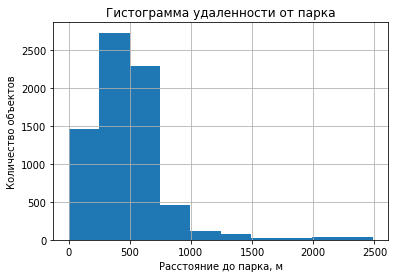

In [342]:
# диаграмма распределения данных в столбце с информацией о расстоянии до ближайшего парка в метрах после предобработки данных:
data_stat ['parks_nearest'].hist()
plt.title ('Гистограмма удаленности от парка')
plt.xlabel ('Расстояние до парка, м')
plt.ylabel ('Количество объектов')

Среди тех объявлений, в которых определено расстояние до ближайшего парка (7252 объявления), половина объектов расположены на удаленности от 290 до 650 м от ближайшего парка. При этом около 2/3 объявлений не имеет данных о расстоянии до ближайшего парка, что возможно свидетельствует об их отсутствии поблизости (менее 3 000 м). 

In [343]:
# размер очищенной от аномальных значений таблицы:
shape_stat = data_stat.shape
shape_stat

(22076, 32)

In [344]:
# доля оставшихся в итоговой таблице данных от первоначального количества:
print ('В итоговой таблице содержится', round(shape_stat[0]/shape_data[0]*100, 2), '% от первоначальных данных.')

В итоговой таблице содержится 93.15 % от первоначальных данных.


Можно провести актуальный анализ, т. к. после фильтрации осталось более 90 % от изначального числа данных.

**4.2. Изучение длительности продажи объектов (столбец `days_exposition`).**

Text(0, 0.5, 'Количество объектов')

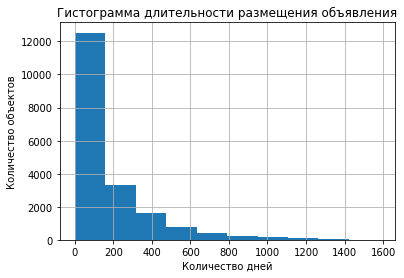

In [345]:
# гистограмма распределения данных в столбце с информацией о количестве дней размещения объявлений:
data_stat ['days_exposition'].hist()
plt.title ('Гистограмма длительности размещения объявления')
plt.xlabel ('Количество дней')
plt.ylabel ('Количество объектов')

In [346]:
# основные характеристики данных в столбце с информацией о количестве дней размещения объявлений:
data_stat ['days_exposition'].describe()

count    19239.000000
mean       178.429024
std        217.295170
min          1.000000
25%         44.000000
50%         94.000000
75%        227.500000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество дней')

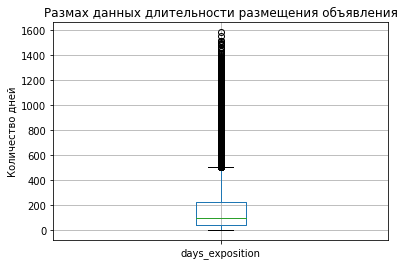

In [347]:
# диаграмма размаха данных в столбце с информацией о количестве дней размещения объявлений:
data_stat.boxplot ('days_exposition')
plt.title ('Размах данных длительности размещения объявления')
plt.ylabel ('Количество дней')

Исходя из данных гистограммы и описания имеющихся данных в столбце с информацией о количестве дней размещения объявлений `days_exposition` средний срок размещения объявления равен 178 дням (на средний срок размещения объявления оказали влияние сверхдолгие объявления, максимальный срок по которым достиг 1 580 дней), половина объектов при этом снята с публикаций через 94 дня. Продажи за 44 дня и менее можно считать быстрыми, а свыше 227 необычно долгими. 

**4.3. Определение факторов, оказывающих сильное влияние на общую (полную) стоимость объекта.**

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**Зависимость цены от общей площади.**


In [348]:
# таблица средних цен в зависимости от общей площади объекта:
(
    data_stat
    .pivot_table (columns='total_area', values='last_price')
)

total_area,20.30,20.50,20.60,21.00,21.10,21.30,21.40,21.89,21.90,22.00,...,156.60,157.00,157.30,157.40,158.00,158.50,158.60,159.00,159.30,159.90
last_price,2740000.0,2085000.0,2000000.0,2.576667e+06,1750000.0,2300000.0,2500000.0,1900000.0,3000000.0,2297500.0,...,15637500.0,14990000.0,26500000.0,25200000.0,19567500.0,15350000.0,12900000.0,17100000.0,25600000.0,22594750.0


Text(0, 0.5, 'Стоимость объекта')

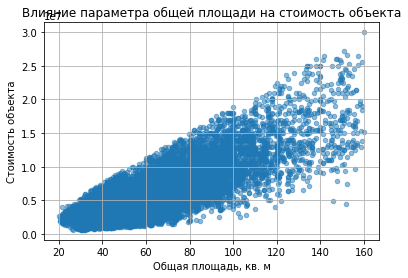

In [349]:
# диаграмма рассеивания данных, характеризующию зависимость цены от общей площади объекта:
(
    data_stat
    .plot (x='total_area', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра общей площади на стоимость объекта')
plt.xlabel ('Общая площадь, кв. м')
plt.ylabel ('Стоимость объекта')

In [350]:
# коэффициент корреляции 2 факторов - цены объекта и его общей площади:
data_stat['last_price'].corr(data_stat['total_area'])

0.8036768848595672

График показывает, что есть прямая зависимость цены объекта от его общей площади.

**Зависимость цены от жилой площади.**


In [351]:
# таблица средних цен в зависимости от жилой площади объекта:
(
    data_stat
    .pivot_table (columns='living_area', values='last_price')
)

living_area,6.0,6.5,8.0,8.3,8.4,8.5,8.9,9.0,9.1,9.8,...,113.0,114.8,115.0,117.1,117.4,118.5,122.1,123.9,125.0,128.0
last_price,3799000.0,4050000.0,6850000.0,4000000.0,4200000.0,4100000.0,5300000.0,5.177143e+06,3490304.0,5300000.0,...,12700000.0,13500000.0,1.616667e+07,14000000.0,13700000.0,15499000.0,15190500.0,13000000.0,12900000.0,12160000.0


Text(0, 0.5, 'Стоимость объекта')

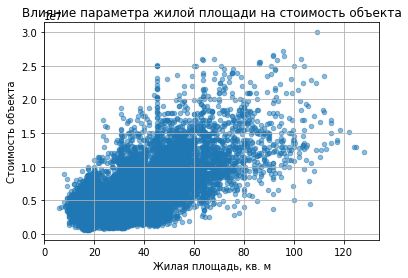

In [352]:
# диаграмму рассеивания данных, характеризующию зависимость цены от жилой площади объекта:
(
    data_stat
    .plot (x='living_area', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра жилой площади на стоимость объекта')
plt.xlabel ('Жилая площадь, кв. м')
plt.ylabel ('Стоимость объекта')

In [353]:
# коэффициент корреляции 2 факторов - цены объекта и его жилой площади:
data_stat['last_price'].corr(data_stat['living_area'])

0.6696982024081484

Прямая зависимость цены объекта от его жилой площади присутствует, но она слабее, чем зависимость от общей площади.

**Зависимость цены от площади кухни.**

In [354]:
# таблица средних цен в зависимости от площади кухни объекта:
(
    data_stat
    .pivot_table (index='kitchen_area', values='last_price')
)

,last_price
kitchen_area,
0.00,2.993164e+06
1.30,4.250000e+06
2.00,3.338000e+06
2.30,2.940000e+06
2.89,5.967734e+06
...,...
56.20,1.970000e+07
58.00,2.150000e+07
60.00,1.230000e+07


Text(0, 0.5, 'Стоимость объекта')

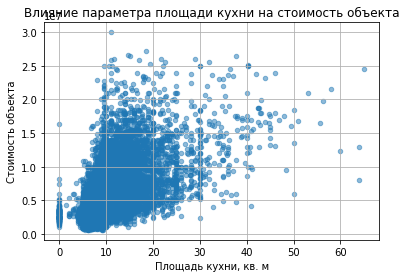

In [355]:
# диаграмму рассеивания данных, характеризующию зависимость цены от площади кухни объекта:
(
    data_stat
    .plot (x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра площади кухни на стоимость объекта')
plt.xlabel ('Площадь кухни, кв. м')
plt.ylabel ('Стоимость объекта')

In [356]:
# коэффициент корреляции 2 факторов - цены объекта и площади его кухни:
data_stat['last_price'].corr(data_stat['kitchen_area'])

0.5648977951682435

Прямая зависимость цены объекта от площади его кухни также присутствует, но она еще слабее, чем зависимость от общей площади и жилой площади.

**Зависимость цены от количества комнат.**


In [357]:
# таблица средних цен в зависимости от количества комнат объекта:
(
    data_stat
    .pivot_table (index='rooms', values='last_price')
)

,last_price
rooms,
0,2.973011e+06
1,3.756015e+06
2,5.233003e+06
3,7.047343e+06
4,9.404269e+06
5,1.130702e+07
6,1.217997e+07
7,1.730400e+07
8,1.610000e+07


Text(0, 0.5, 'Стоимость объекта')

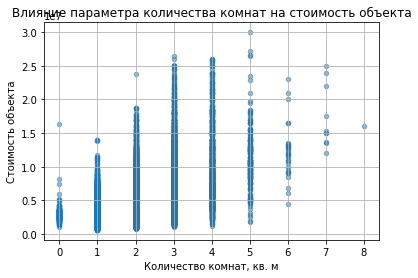

In [358]:
# диаграмму рассеивания данных, характеризующию зависимость цены от количества комнат объекта:
(
    data_stat
    .plot (x='rooms', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра количества комнат на стоимость объекта')
plt.xlabel ('Количество комнат, кв. м')
plt.ylabel ('Стоимость объекта')

In [359]:
# коэффициент корреляции 2 факторов - цены объекта и количества комнат:
data_stat['last_price'].corr(data_stat['rooms'])

0.521509673025116

Прямая зависимость цены объекта от количества комнат также присутствует, но она такая же слабая, как и зависимость от площади кухни.

**Зависимость цены от этажа, на котором расположен объект (первый, последний, другой).**


In [360]:
# таблица средних цен в зависимости от этажа, на котором расположен объект:
(
    data_stat
    .pivot_table (columns='floor_type', values='last_price')
)

floor_type,другой,первый,последний
last_price,5.543768e+06,4.435075e+06,5.484599e+06


Text(0, 0.5, 'Стоимость объекта')

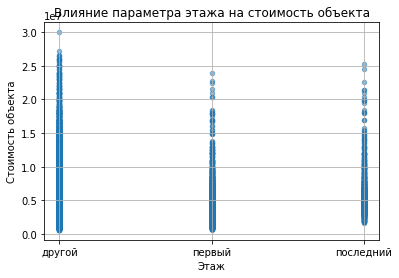

In [361]:
# диаграмму рассеивания данных, характеризующию зависимость цены от этажа объекта:
(
    data_stat
    .plot (x='floor_type', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра этажа на стоимость объекта')
plt.xlabel ('Этаж')
plt.ylabel ('Стоимость объекта')

Зависимость цены объекта от этажа, на котором расположен объект, также присутствует, но она очень слабо выражена. Самые дорогие объеты хоть и находятся на других этажай (не на первом и не на последнем), но дешевые объекты встречаются как на первом, так и на другом этаже, меньше всего дешевые объекты встречаются на последнем этаже.

**Зависимость цены от даты размещения (день недели, месяц, год).**


In [362]:
# таблица средних цен в зависимости от дня размещения объявления:
(
    data_stat
    .pivot_table (index='weekday_1exposition', values='last_price')
)

,last_price
weekday_1exposition,
0,5.398671e+06
1,5.467907e+06
2,5.438374e+06
3,5.494321e+06
4,5.347339e+06
5,5.235815e+06
6,5.259384e+06


Text(0, 0.5, 'Стоимость объекта')

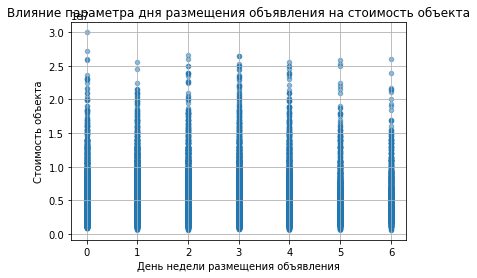

In [363]:
# диаграмму рассеивания данных, характеризующию зависимость цены от дня размещения объявления:
(
    data_stat
    .plot (x='weekday_1exposition', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра дня размещения объявления на стоимость объекта')
plt.xlabel ('День недели размещения объявления')
plt.ylabel ('Стоимость объекта')

In [364]:
# коэффициент корреляции 2 факторов - цены объекта и дня размещения объявления:
data_stat['weekday_1exposition'].corr(data_stat['rooms'])

-0.005045720105484933

In [365]:
# таблица средних цен в зависимости от месяца размещения объявления:
(
    data_stat
    .pivot_table (index='month_1exposition', values='last_price')
)

,last_price
month_1exposition,
1,5.431460e+06
2,5.354126e+06
3,5.380278e+06
4,5.505039e+06
5,5.438717e+06
6,5.136718e+06
7,5.382241e+06
8,5.360773e+06
9,5.573997e+06


Text(0, 0.5, 'Стоимость объекта')

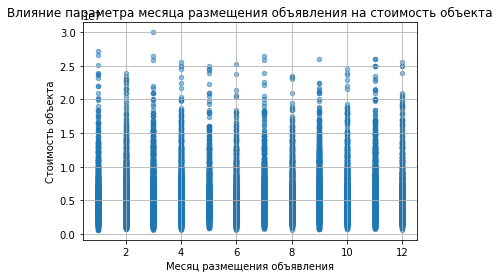

In [366]:
# диаграмму рассеивания данных, характеризующию зависимость цены от месяца размещения объявления:
(
    data_stat
    .plot (x='month_1exposition', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра месяца размещения объявления на стоимость объекта')
plt.xlabel ('Месяц размещения объявления')
plt.ylabel ('Стоимость объекта')

In [367]:
# коэффициент корреляции 2 факторов - цены объекта и месяца размещения объявления:
data_stat['month_1exposition'].corr(data_stat['rooms'])

-0.0038145193171861703

In [368]:
# таблица средних цен в зависимости от года размещения объявления:
(
    data_stat
    .pivot_table (index='year_1exposition', values='last_price')
)

,last_price
year_1exposition,
2014,8.693062e+06
2015,6.150899e+06
2016,5.370228e+06
2017,5.276829e+06
2018,5.274935e+06
2019,5.727504e+06


Text(0, 0.5, 'Стоимость объекта')

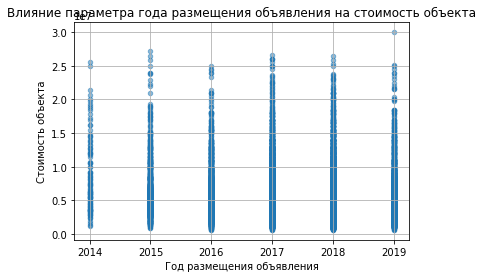

In [369]:
# диаграмму рассеивания данных, характеризующию зависимость цены от года размещения объявления:
(
    data_stat
    .plot (x='year_1exposition', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
plt.title ('Влияние параметра года размещения объявления на стоимость объекта')
plt.xlabel ('Год размещения объявления')
plt.ylabel ('Стоимость объекта')

In [370]:
# коэффициент корреляции 2 факторов - цены объекта и года размещения объявления:
data_stat['year_1exposition'].corr(data_stat['rooms'])

-0.044427187289611834

Зависимость общей (полной) стоимости объекта от даты размещения (день недели, месяц, год) отсутствует.

**4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [371]:
top10_location = (
    data_stat
    .pivot_table (index='locality_name', values='price_1m', aggfunc=('count', 'mean'))
    .sort_values('count', ascending=False)
    .head (10)
)
top10_location ['mean'] = top10_location ['mean'].round(2)
top10_location = top10_location.rename(
    columns={
        'count': 'ads_number',
        'mean': 'price_1m_avg'
    }
)
top10_location.sort_values(by='price_1m_avg', ascending=False)

,ads_number,price_1m_avg
locality_name,,
Санкт-Петербург,14483,107462.24
Пушкин,353,102106.45
деревня Кудрово,455,95133.96
поселок Парголово,323,90366.29
поселок Мурино,560,85725.64
поселок Шушары,434,78476.42
Колпино,333,75334.93
Гатчина,302,69227.15
Всеволожск,389,67301.70


**Вывод:** Cамая высокая стоимость квадратного метра в г. Санкт-Петербург, а самая низкая - в г. Выборг.

**4.5. Выявление зависимости стоимости объектов от расстояния до центра г. Санкт-Петербурга.**

In [372]:
# выбор объявлений о продаже квартир в г. Санкт-Петербург с заполненными данными в столбце, содержащем информацию 
# о расстоянии до центра города:
data_spb = data_stat.query('(locality_name == "Санкт-Петербург")  and city_center_near_km >= 0.00')
data_spb.pivot_table (index='city_center_near_km', values='price_1m')

,price_1m
city_center_near_km,
0.0,115300.352727
1.0,121963.791304
2.0,115423.895067
3.0,112679.397803
4.0,117554.243600
5.0,122202.643801
6.0,123532.834705
7.0,119941.974906
8.0,120064.364936


Text(0, 0.5, 'Средняя цена 1 м объекта')

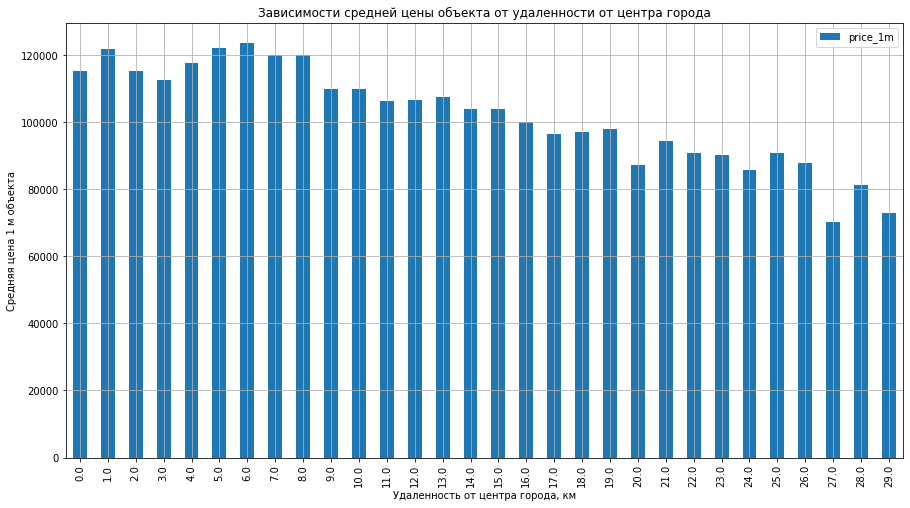

In [373]:
# диаграмма для наглядного изображения зависимости средней цены объекта в г. Санкт-Петербург от удаленности 
# от центра города 
( 
    data_spb
    .pivot_table (index='city_center_near_km', values='price_1m')
    .plot (y='price_1m', kind='bar', figsize=(15, 8), grid=True)
)
plt.title ('Зависимости средней цены объекта от удаленности от центра города')
plt.xlabel ('Удаленность от центра города, км')
plt.ylabel ('Средняя цена 1 м объекта')

**Вывод:** чем дальше от центра г. Санкт-Петербурга, тем ниже стоимость объектов. При этом в радиусе от 1 до 8 км средняя цена квадратного метра объектов не сильно отличается (около 120 000 р. за кв.м), а начиная с 9 км начинается плавное снижение и доходит до 73 000 руб. за кв.м у объектов, удаленность от центра которых составляет 29 км.  

### Общий вывод

**Исходные данные:** в ходе исследования был проведен анализ данных сервиса Яндекс Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет с целью установления параметров, влияющих на цену объектов.
    
Архив включает в себя 23699 строк. В ходе преобработки исходных данных обнаружены пропуски в столбцах, содержащих данные о наличии балконов, высоте потолков, общего количества этажей в доме, принадлежность к апартаментам, жилой площади, площади кухни и местоположения объекта, а также географические данные о расположении относительно других объектов (центра города, прудов, парков). Проведены заполнения пропусков в столбцах, где это возможно было сделать, основываясь на данных в других столбцах, или произведены логические замены:
- в столбце с данными о количестве балконов пропуски заменены на нулевые значения;
- пропуски в столбце, характеризующем принадлежность к апартоментам, проставлены значения "False";
- пропуски в столбцах с данными о жилой площади и площади кухни заполнены медианным значением по аналогичным квартирам, имеющим соответствующее количество комнат;
- пропуски в столбце с данными о высоте потолков - медианным значением по аналогичным домам, исходя из их общей этажности.

Пропуски в столбцах, характеризующих географическое положение объектов, и в столбце с данными о количестве дней размещения объявления остались, т.к. их значения не зависят от других параметров и не подлежат логической замене без риска искажения данных.
Также данные приведены в соответствующий для них тип, устранены неявные дубликаты в наименованиях населенных пунктов и редкие выбивающиеся значения для получения более однородной выборки.

Для анализа дополнительно добавлены новые данные, исходя из существующих данных в других столбцах:
* цена одного квадратного метра (как отношение стоимости объекта к его общей площади);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.
    
  
**Исследование:** 

1. В ходе исследования выявлено, что в очищенной выборке данных наиболее часто встречаются объявления о продаже объектов со следующими значениями:
- общая площадь объектов - от 40 до 68 кв. м;
- жилая площадь объектов - от 18 до 42 кв. м;
- площадь кухни объектов - от 7 до 11 кв. м;
- стоимость объектов - от 76 до 112 тыс.руб. за 1 кв. м;
- 1-комнатные или 2-комнатные, реже, но тоже весомая категория - 3-комнатные;
- высота потолков - от 2.5 до 3.0 кв. м;
- не на первом и не на последнем этажах;
- в 5-, 9-, 16-, 12- либо 10-этажных домах; 
- среди тех объявлений, в которых определено расстояние до центра (16901 объявление), большая часть объектов расположены на удаленности от 9.9 до 16.5 км от центра города;
- среди тех объявлений, в которых определено расстояние до ближайшего парка (7252 объявления), половина объектов расположены на удаленности от 290 до 650 м от ближайшего парка.
    
2. Анализ данных с информацией о количестве дней размещения объявлений `days_exposition` показал, что средний срок размещения объявления равен 178 дням (на средний срок размещения объявления оказали влияние сверхдолгие объявления, максимальный срок по которым достиг 1 580 дней), половина объектов при этом снята с публикаций через 94 дня. Продажи за 44 дня и менее можно считать быстрыми, а свыше 227 необычно долгими. 


3. Анализ факторов, влияющих на стоимость объектов, выявил прямую зависимость цены от общей площади объектов. Также оказывают влияние на формирование цены объекта, но в меньшей мере, жилая площадь объектов, площадь кухни, количество комнат и этаж, на котором расположен объект. Дата размещения (день недели, месяц, год) не оказывают влияния на формирование цены объекта.


4. Определено, что из 10 самых популярных населенных пунктов самая высокая стоимость квадратного метра в г. Санкт-Петербург (107462.24 руб.), второй по стоимости квадратного метра - г. Пушкин (102106.45 руб.), а самая низкая стоимость квадратного метра в г. Выборг (58146.51 руб.).


5. Больше всего объявлений (~2/3) о продаже объектов в г. Санкт-Петербург, где стоимость объектов также зависит от удаленности от центра города: после 8 км средняя цена квадратного метра объектов (около 120 000 р. за кв.м) начинает плавное снижение и доходит до 73 000 руб. за кв.м у объектов, удаленность от центра которых составляет 29 км. 

***Рекомендации:***
1. Установить флаг обязательного заполнения важных для анализа данных, таких как жилая площадь, площадь кухни, общая этажность дома.
2. Установить проверку значений в данных, чтобы исключить риск возникновения ошибок, таких как превышение жилой площади над общей или высота потолков ниже разрешенного минимума.
3. Скорректировать типы выгружаемых данных в соответствии с их значениями.
4. Ввести список выдаваемых значений в поле с данными о населенных пунктах для исключения возникновения неявных дубликатов.
5. Предусмотреть дополнительную отправку на модерацию для объявлений, имеющих нехарктерные особенности в соответствии с проведенным анализом:
    - нетипичные параметры объектов (выдающиеся значения площади, высоты потолков);
    - слишком долгий срок размещения объявления;
    - нетипичная цена для населенного пункта;
    - нетипичная цена для размерных характеристик объекта;
    - нетипичное распределение цены по географическим характеристикам объекта (удаленность от центра).